In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

## Data importing

In [2]:
dataset = pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Understanding

In [3]:
dataset.shape

(21, 2)

In [4]:
dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
dataset.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

## Data Preperation

In [6]:
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Visualiasation

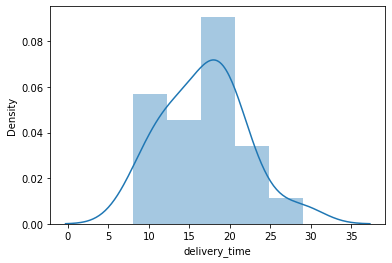

In [7]:
sns.distplot(dataset['delivery_time'])
plt.show()

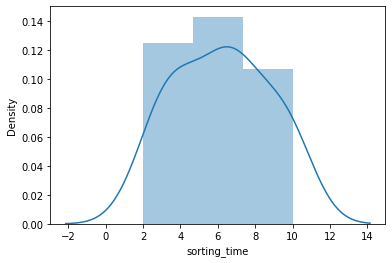

In [8]:
sns.distplot(dataset['sorting_time'])
plt.show()

In [9]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

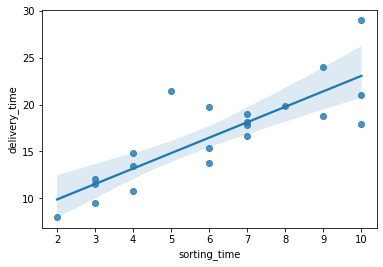

In [10]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

## Model Building

In [11]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

## Model Testing

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        12:44:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square Root transformation on data

In [13]:
model1 = smf.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = dataset).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 20 Jul 2022   Prob (F-statistic):           8.48e-07
Time:                            12:44:09   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation on Data

In [14]:
model2 = smf.ols('np.log(delivery_time)~np.log(sorting_time)', data = dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Wed, 20 Jul 2022   Prob (F-statistic):           1.60e-07
Time:                           12:44:09   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
model1_pred_y =np.square(model1.predict(dataset['sorting_time']))
model2_pred_y =np.exp(model2.predict(dataset['sorting_time']))

In [17]:
model1_rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(dataset['delivery_time'], model2_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse)

model= 2.9349037688901394 
model1= 2.762294279320867 
model2= 2.7458288976145497


In [18]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model2_rmse}
min(data, key=data.get)
print("As the Minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use", min(data, key=data.get), "For Predction")

As the Minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 For Predction


## Model Predictions

###  Building & Predicting Log Model

In [19]:
predicted = pd.DataFrame()
predicted['sorting_time'] = dataset.sorting_time
predicted['delivery_time'] = dataset.delivery_time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.sorting_time)))
predicted

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


### Building & Predicting Root Squared Model

In [20]:
predicted1 = pd.DataFrame()
predicted1['sorting_time'] = dataset.sorting_time
predicted1['delivery_time'] = dataset.delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model1.predict(predicted1.sorting_time)))
predicted1

,sorting_time,delivery_time,Predicted_Delivery_Time
0,10,21.00,119.434336
1,4,13.50,37.259705
2,6,19.75,58.463267
3,9,24.00,101.507158
4,10,29.00,119.434336
5,6,15.35,58.463267
6,7,19.00,71.171702
7,3,9.50,28.484761
8,10,17.90,119.434336
9,9,18.75,101.507158


#### Both "R-squared & Log Transformed" Prediction Model For the Delivery Time with given data is Built Successfully.

### As the Minimum RMSE and highest Adjusted R-squared score, We use Log Model for Prediction.